In [1]:
# load some libraries
import sys
import os
sys.path.insert(1, '..')
os.chdir('..')

import darts
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.darts_processing import *

In [2]:
# plots of uninterpolated glucose data for each patient
formatter, series, scalers = load_data(seed=0, study_file=None, dataset='hall', use_covs=False, use_static_covs=True)

--------------------------------
Loading column definition...
Checking column definition...
Loading data...
Dropping columns / rows...
Checking for NA values...
Setting data types...
Dropping columns / rows...
Encoding data...
	Updated column definition:
		id: REAL_VALUED (ID)
		time: DATE (TIME)
		gl: REAL_VALUED (TARGET)
		Age: REAL_VALUED (STATIC_INPUT)
		BMI: REAL_VALUED (STATIC_INPUT)
		A1C: REAL_VALUED (STATIC_INPUT)
		FBG: REAL_VALUED (STATIC_INPUT)
		ogtt.2hr: REAL_VALUED (STATIC_INPUT)
		insulin: REAL_VALUED (STATIC_INPUT)
		hs.CRP: REAL_VALUED (STATIC_INPUT)
		Tchol: REAL_VALUED (STATIC_INPUT)
		Trg: REAL_VALUED (STATIC_INPUT)
		HDL: REAL_VALUED (STATIC_INPUT)
		LDL: REAL_VALUED (STATIC_INPUT)
		mean_glucose: REAL_VALUED (STATIC_INPUT)
		sd_glucose: REAL_VALUED (STATIC_INPUT)
		range_glucose: REAL_VALUED (STATIC_INPUT)
		min_glucose: REAL_VALUED (STATIC_INPUT)
		max_glucose: REAL_VALUED (STATIC_INPUT)
		quartile.25_glucose: REAL_VALUED (STATIC_INPUT)
		median_glucose: REAL_VA

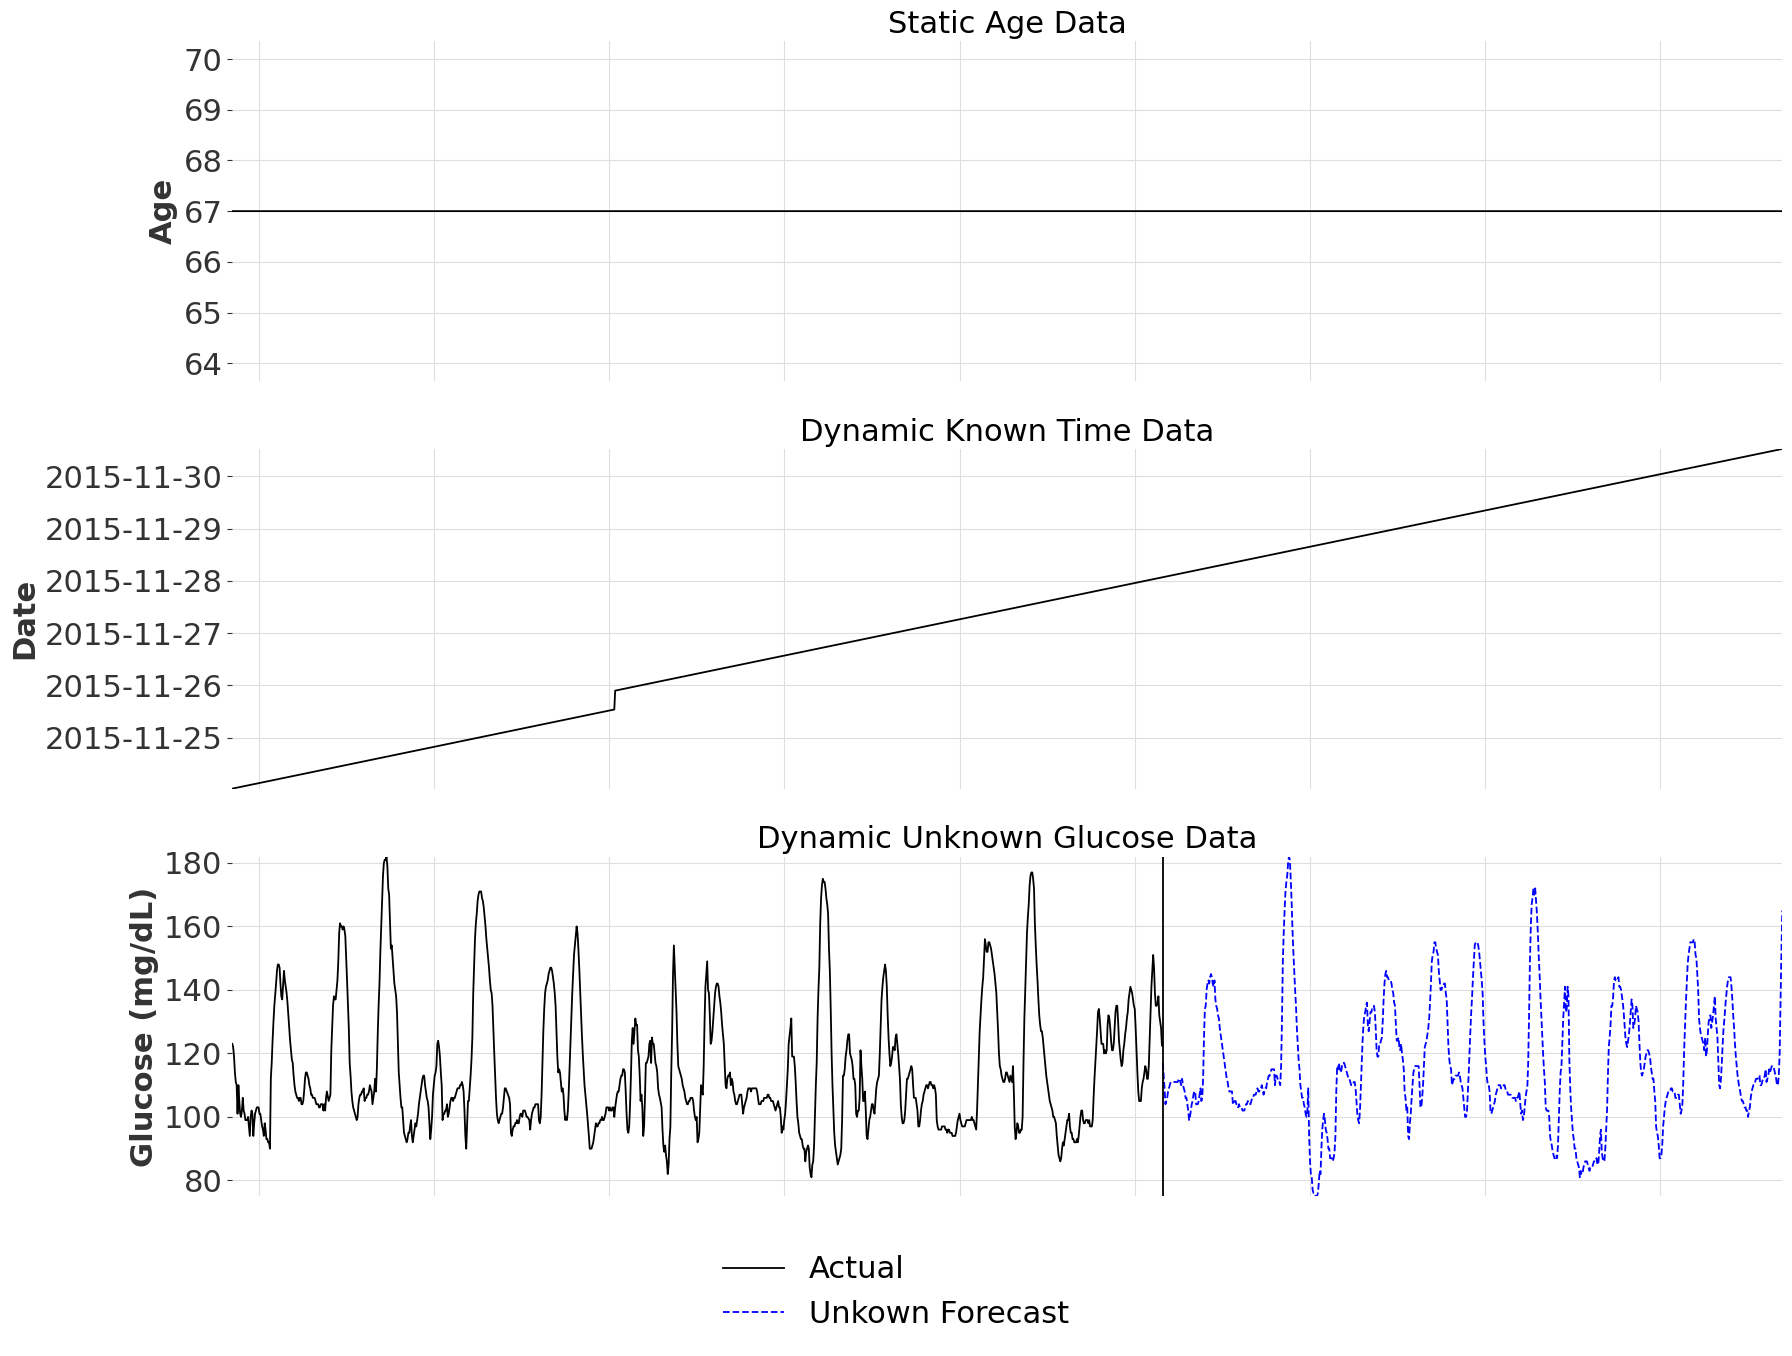

In [7]:
subject = formatter.data.loc[formatter.data['id'] == 1]

fig, axs = plt.subplots(3, 1, figsize=(20, 15))

# Plot Data
axs[0].plot(subject['Age'])
axs[0].set_title("Static Age Data")
axs[1].plot(subject['time'])
axs[1].set_title("Dynamic Known Time Data")
axs[2].plot(subject['gl'].iloc[0:int(0.6 * len(subject))], label = 'Actual')
axs[2].plot(subject['gl'].iloc[int(0.6 * len(subject)):], color = 'blue', linestyle = '--', label = 'Unkown Forecast')
axs[2].axvline(1770 + int(0.6 * len(subject)))
axs[2].set_title("Dynamic Unknown Glucose Data")

# Remove Grid
# axs[0].grid(False)
# axs[1].grid(False)
# axs[2].grid(False)

ylabels = ['Age', 'Date', 'Glucose (mg/dL)']

# Set fontsizes and remove xticks
for i in range(len(axs)):
    axs[i].tick_params(
        axis='x',         
        which='both',     
        bottom=False,      
        top=False,         
        labelbottom=False)
    axs[i].set_ylabel(ylabels[i], fontsize = 22)
    for item in ([axs[i].title, axs[i].xaxis.label, axs[i].yaxis.label] +
                axs[i].get_xticklabels() + axs[i].get_yticklabels()):
        item.set_fontsize(22)

# Set Colors
axs[0].margins(0)
axs[1].margins(0)
axs[2].margins(0)
#axs[2].axvspan(1820 + int(0.6*len(subject)), 1820 + len(subject), facecolor='#C8FEC7', alpha = 0.25, edgecolor = None)

# Legend
fig.legend(loc='lower center', fontsize=22)

# fig.tight_layout()

plt.savefig('presentation/plots/features_figure.pdf', bbox_inches='tight')